Algorithm 4: Heuristic Solution for BCRP-MNCC problem with the given number of sensor nodes
Range R:  5
Budget B:  5
Initial Graph G
Edges: 
[(0, 1, {'length': 23, 'weight': 4}), (0, 2, {'length': 5, 'weight': 0}), (0, 3, {'length': 20, 'weight': 3}), (0, 4, {'length': 46, 'weight': 9}), (0, 5, {'length': 7, 'weight': 1}), (0, 6, {'length': 5, 'weight': 0}), (1, 2, {'length': 18, 'weight': 3}), (1, 3, {'length': 26, 'weight': 5}), (1, 4, {'length': 3, 'weight': 0}), (1, 5, {'length': 47, 'weight': 9}), (1, 6, {'length': 10, 'weight': 1}), (2, 3, {'length': 15, 'weight': 2}), (2, 4, {'length': 45, 'weight': 8}), (2, 5, {'length': 48, 'weight': 9}), (2, 6, {'length': 29, 'weight': 5}), (3, 4, {'length': 38, 'weight': 7}), (3, 5, {'length': 10, 'weight': 1}), (3, 6, {'length': 46, 'weight': 9}), (4, 5, {'length': 2, 'weight': 0}), (4, 6, {'length': 40, 'weight': 7}), (5, 6, {'length': 14, 'weight': 2})]
Nodes: 
[(0, {'sensornode': True}), (1, {'sensornode': True}), (2, {'sensornode': True

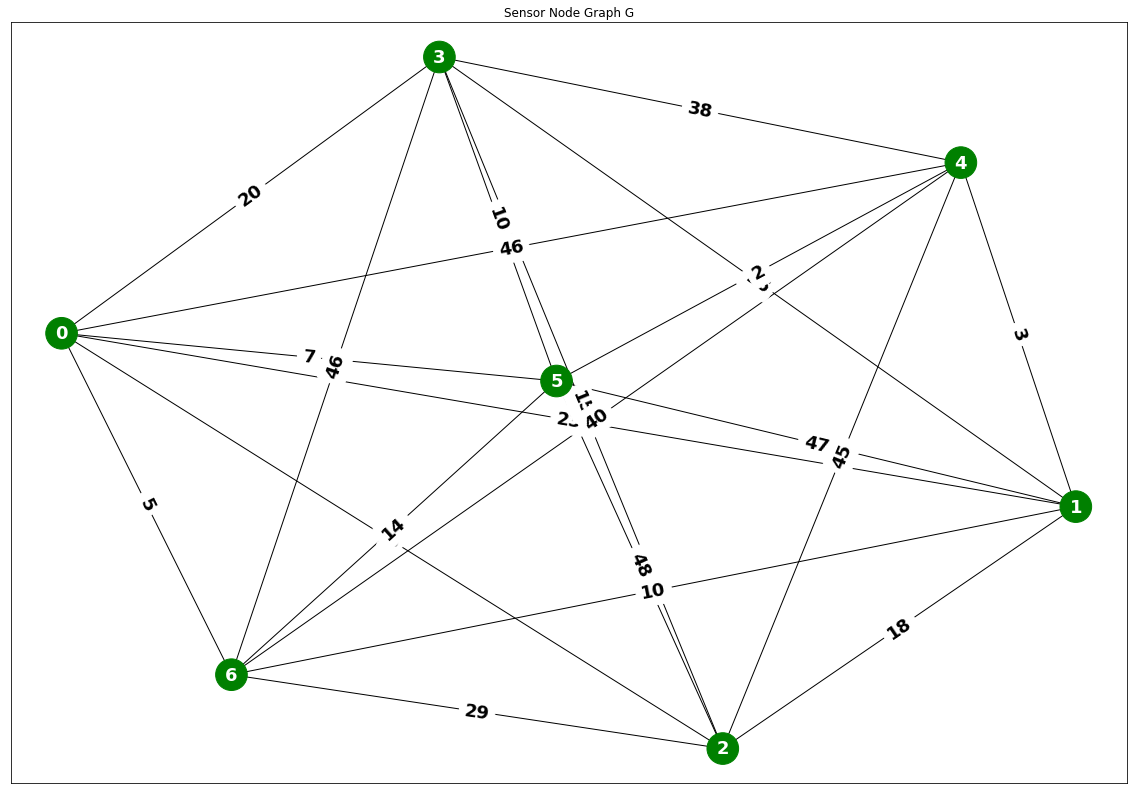

2  Relay nodes needed
Budget constraint NOT violated!


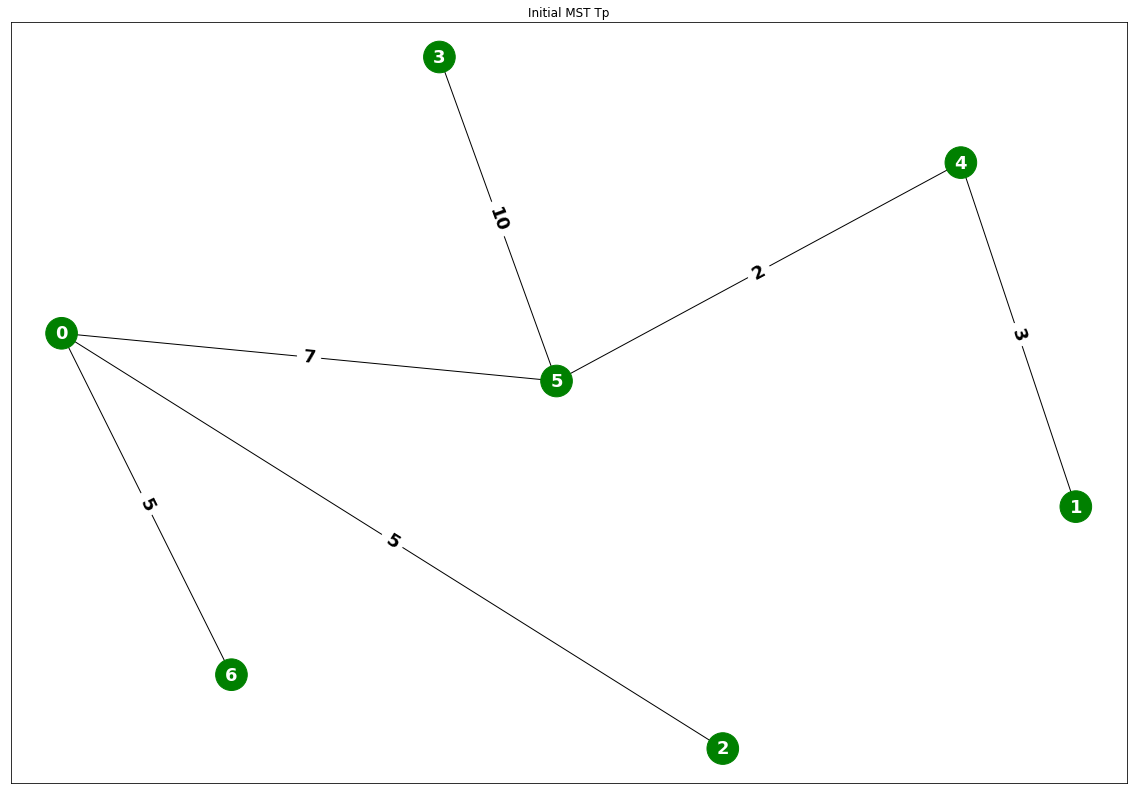

In [12]:
%reset -f
%matplotlib inline
import sys

import matplotlib.pyplot as plt
import networkx as nx
import random
import math
#importing graphviz for fixed graph layout. graphviz should be installed using homebrew.
#$brew install graphviz 
#$pip install pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

#set range R
R = 5
#set max budget B
B = 5

#set max distance between two sensor nodes
maxdist = 50

print('Algorithm 4: Heuristic Solution for BCRP-MNCC problem with the given number of sensor nodes')
print("Range R: ",R)
print("Budget B: ",B)

#creating the sensor node graph with random edges
N=random.randint(2,20)
G= nx.complete_graph(N)
nx.set_node_attributes(G, True, name='sensornode')


for (a,b) in G.edges():
    G.edges[a,b]['length'] = random.randint(1,maxdist)
    G.edges[a,b]['weight'] = 0 if (math.ceil(G.edges[a,b]['length']/R)-1)<0 else (math.ceil(G.edges[a,b]['length']/R)-1)

print('Initial Graph G')
print('Edges: ')
print(G.edges(data=True))
print('Nodes: ')
print(G.nodes(data=True))

#creating the source sensor node graph with fixed edges
# G = nx.cycle_graph(5)
# G.add_edge(0,1,weight=2)
# G.add_edge(0,3,weight=3)
# G.add_edge(0,4,weight=3)
# G.add_edge(1,2,weight=3)
# G.add_edge(2,3,weight=5)
# G.add_edge(3,4,weight=2)
G.pos = graphviz_layout(G)

#sensor nodes are represented by green and relay nodes by red
colorvalues = ['green' if node[1].get('sensornode') else 'red' for node in G.nodes(data=True)]

#ploting the source sensor node graph G
plt.figure(figsize=(20,14))
plt.title("Sensor Node Graph G")
pos=G.pos
edge_labels=nx.get_edge_attributes(G,'length')
nx.draw_networkx_edge_labels(G,pos,edge_labels, font_size=18, font_color='black', font_family='sans-serif', font_weight='bold')
nx.draw_networkx(G,pos,with_labels=True,node_size=1000, node_color=colorvalues, font_size=18, font_color='white', font_family='sans-serif', font_weight='bold')
plt.show()


#Algorithm 4
#computing the minimum spanning tree(MST) based on edge length i.e distance between points
Tp = nx.minimum_spanning_tree(G,weight='length', algorithm='prim')
Tp.pos = graphviz_layout(G)


weightsum =0
for edge in Tp.edges(data=True):
    weightsum = weightsum+edge[2].get('weight')

print(weightsum, ' Relay nodes needed')
if weightsum>B:
    print('Budget constraint violated!')
else:
    print('Budget constraint NOT violated!')
    

#plotting the forest Tp
plt.clf
plt.figure(figsize=(20,14))
plt.title("Initial MST Tp")
pos=Tp.pos
colorvalues = ['green' if node[1].get('sensornode') else 'red' for node in Tp.nodes(data=True)]
edge_labels=nx.get_edge_attributes(Tp,'length')
nx.draw_networkx_edge_labels(Tp,pos,edge_labels, font_size=18, font_color='black', font_family='sans-serif', font_weight='bold')
nx.draw_networkx(Tp,pos,with_labels=True,node_size=1000, node_color=colorvalues, font_size=18, font_color='white', font_family='sans-serif', font_weight='bold')
plt.show()

prunecount=0
while weightsum>B:
    maxweightedge = None
    maxweight = 0
    for edge in Tp.edges(data=True):
        if edge[2].get('weight')>maxweight:
            maxweightedge = edge
            maxweight = edge[2].get('weight')
    Tp.remove_edge(maxweightedge[0],maxweightedge[1])
    prunecount+=1
    
    #plotting the forest Tp after each prune
    plt.clf
    plt.figure(figsize=(20,14))
    plt.title("Forest Tp after pruning "+str(prunecount)+" times")
    pos=Tp.pos
    colorvalues = ['green' if node[1].get('sensornode') else 'red' for node in Tp.nodes(data=True)]
    edge_labels=nx.get_edge_attributes(Tp,'length')
    nx.draw_networkx_edge_labels(Tp,pos,edge_labels, font_size=18, font_color='black', font_family='sans-serif', font_weight='bold')
    nx.draw_networkx(Tp,pos,with_labels=True,node_size=1000, node_color=colorvalues, font_size=18, font_color='white', font_family='sans-serif', font_weight='bold')
    plt.show()
    
    weightsum =0
    for edge in Tp.edges(data=True):
        weightsum = weightsum+edge[2].get('weight')


Final forest with sensor and relay nodes(if any)
Edges: 
[(0, 2, {'length': 5, 'weight': 0}), (0, 6, {'length': 5, 'weight': 0}), (0, 7, {'length': 3.5}), (1, 4, {'length': 3, 'weight': 0}), (3, 8, {'length': 5.0}), (4, 5, {'length': 2, 'weight': 0}), (5, 7, {'length': 3.5}), (5, 8, {'length': 5.0})]
Nodes: 
[(0, {'sensornode': True}), (1, {'sensornode': True}), (2, {'sensornode': True}), (3, {'sensornode': True}), (4, {'sensornode': True}), (5, {'sensornode': True}), (6, {'sensornode': True}), (7, {'sensornode': False}), (8, {'sensornode': False})]


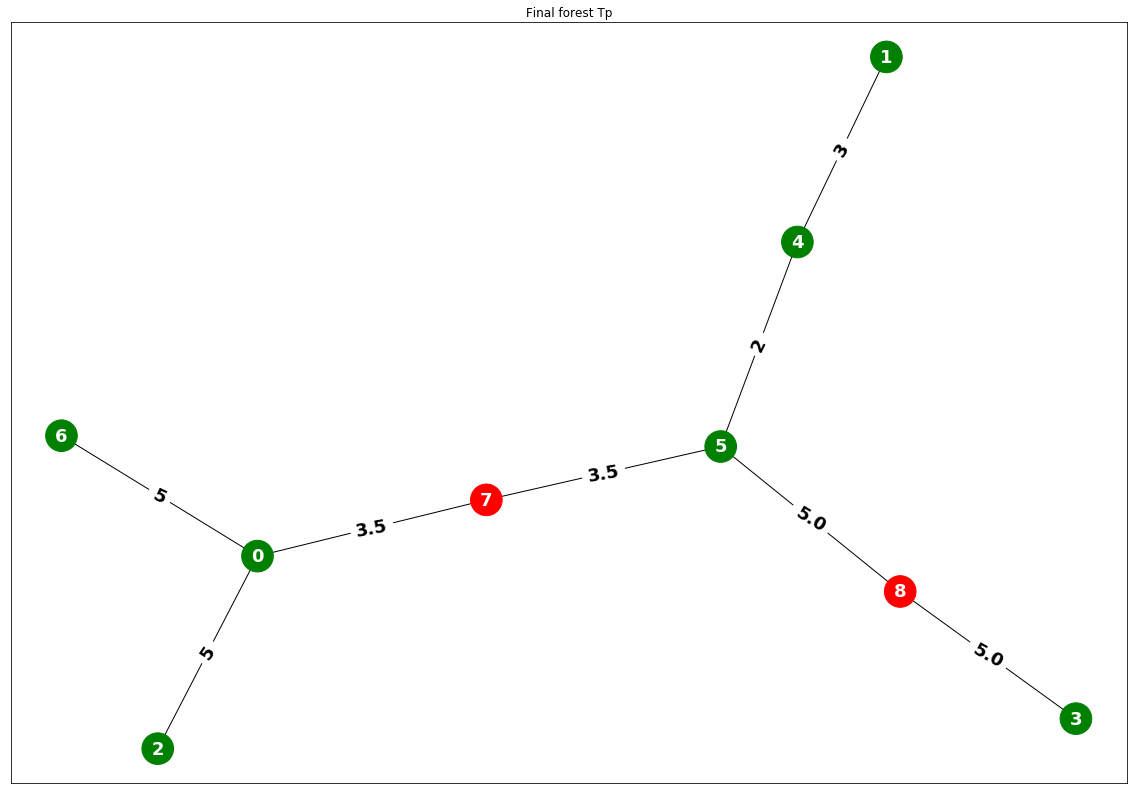

In [13]:
#add relay nodes for visualization purpose
Tpp = Tp.copy()
lastnodenumber = len(Tp.nodes())-1
for edge in Tpp.edges(data=True):
    sensornodelist = list(range(1,edge[2].get('weight')+1))
    sensornodelist = [x+lastnodenumber for x in sensornodelist]
    if len(sensornodelist)!=0:
        lastnodenumber = max(sensornodelist)
        for i in sensornodelist:
            Tp.add_node(i, sensornode=False)
        Tp.add_path([edge[0]]+sensornodelist+[edge[1]],length=round((edge[2].get('length')/(edge[2].get('weight')+1)),1))
        Tp.remove_edge(edge[0],edge[1])

Tp.pos = graphviz_layout(Tp)

print('Final forest with sensor and relay nodes(if any)')
print('Edges: ')
print(Tp.edges(data=True))
print('Nodes: ')
print(Tp.nodes(data=True))

#plotting the final forest Tp
plt.clf
plt.figure(figsize=(20,14))
plt.title("Final forest Tp")
pos=Tp.pos
colorvalues = ['green' if node[1].get('sensornode') else 'red' for node in Tp.nodes(data=True)]
edge_labels=nx.get_edge_attributes(Tp,'length')
nx.draw_networkx_edge_labels(Tp,pos,edge_labels, font_size=18, font_color='black', font_family='sans-serif', font_weight='bold')
nx.draw_networkx(Tp,pos,with_labels=True,node_size=1000, node_color=colorvalues, font_size=18, font_color='white', font_family='sans-serif', font_weight='bold')
plt.show()